This notebook is to try out different architectures of NNs

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? н
Once deleted, variables cannot be recovered. Proceed (y/[n])? н
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [18]:
from functions import *
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
from optparse import OptionParser
import matplotlib
matplotlib.use('Agg')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

%matplotlib inline

# 1. Training NN for a single chunk

In [5]:
min_max_scaler = MinMaxScaler()
n_iter = 500

chunk = 'S5'
print (chunk)
data, labels, unique_mutations[chunk], aa_seq, mutlist = read_data_all_positions(chunk)
np.random.shuffle(labels)

scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))

x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.01)

model = Sequential()

model.add(Dense(2, input_dim=data.shape[1], activation='sigmoid', kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='glorot_normal'))

model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error')

hist = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                        epochs=n_iter, batch_size=500, shuffle=True)

proba = model.predict_proba(data, batch_size=500)

weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

true = labels
predicted = min_max_scaler.inverse_transform(proba)
predicted = predicted.flatten()
fitness_potential = data.dot(weights) + biases

S5
Train on 50610 samples, validate on 512 samples
Epoch 1/500
50610/50610 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0094
Epoch 2/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0080
Epoch 3/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0083
Epoch 4/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 5/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 6/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 7/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 8/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0082
Epoch 9/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 10/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_l

50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0079
Epoch 86/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0079
Epoch 87/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 88/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0078
Epoch 89/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 90/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0080
Epoch 91/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 92/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0080ss:
Epoch 93/500
50610/50610 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0082
Epoch 94/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 95/500
50610/50610 [==============

50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 252/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 253/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 254/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 255/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 256/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 257/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0081
Epoch 258/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 259/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 260/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 261/500
50610/50610 [=======

50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 418/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 419/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 420/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0081
Epoch 421/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 422/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 423/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0079
Epoch 424/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 425/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 426/500
50610/50610 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0078
Epoch 427/500
50610/50610 [=======

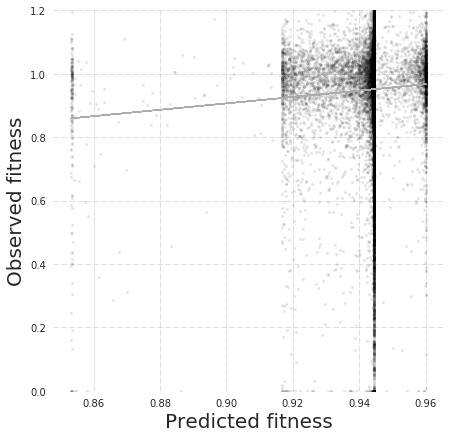

In [7]:
plt.figure(figsize = [7,7])
y = true
x = predicted
plt.ylim(0,1.2)

x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y)

plt.grid(True, ls='--', lw=0.5, alpha=0.5, dash_capstyle = 'round', c='gray')
plt.plot(x, y,'ok',alpha=0.1, ms=3)
plt.plot(x, a*x, '#abacac', lw=1, alpha=1)
plt.xlabel('Predicted fitness', fontsize=20)
plt.ylabel('Observed fitness', fontsize=20);

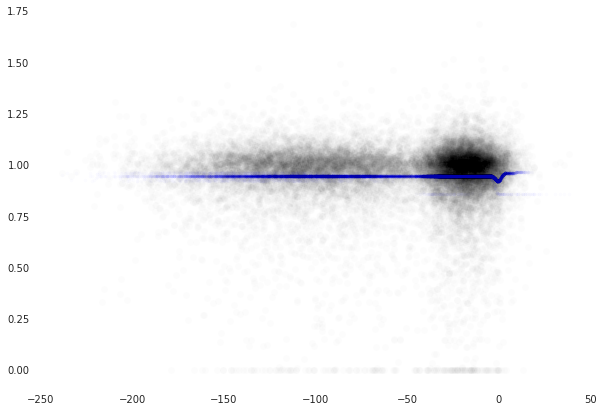

In [8]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential[:10000], true[:10000], 'ok', alpha = 0.01);
plt.plot(fitness_potential[:10000], predicted[:10000], '.b', alpha = 0.01);

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true,predicted)
r_value

0.054585349912062535

# 2. Training all the segments with the chosen architecture

#### 2.1. Training

In [7]:
true = {}
predicted = {}
fitness_potential = {}
hist = {}
weights = {}
old_weights = {}
biases = {}
aa_seq = {}
unique_mutations = {}
mut_list = {}

In [123]:
min_max_scaler = MinMaxScaler()
n_iter = 200

for chunk in ['S8','S10']:
    print (chunk)
    data, labels, unique_mutations[chunk], aa_seq[chunk], mut_list[chunk] = read_data_all_positions(chunk)
    
    scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))
    
    x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.05)
    it=0
    loop_count=1
    
    while it<loop_count and loop_count<100:

        print it
        model = Sequential()

        model.add(Dense(1,input_dim=data.shape[1],activation='sigmoid',kernel_initializer='glorot_normal'))
        model.add(Dense(2,activation='sigmoid'))
        model.add(Dense(1,activation='sigmoid'))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        early_stopping_monitor=EarlyStopping(patience=20)

        model.compile(optimizer=opt,
                      loss='mean_squared_error')

        hist[chunk] = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                                epochs=n_iter, batch_size=500, shuffle=True, callbacks=[early_stopping_monitor],verbose=1)

        proba = model.predict_proba(data, batch_size=500, verbose=0)

        weights[chunk] = model.layers[0].get_weights()[0]
        biases[chunk] = model.layers[0].get_weights()[1]

        true[chunk] = scaledLabels
#         predicted[chunk] = min_max_scaler.inverse_transform(proba)
        predicted[chunk] = proba.flatten()
        fitness_potential[chunk] = data.dot(weights[chunk]) + biases[chunk]
        
        proba = model.predict_proba(x_valid, batch_size=500, verbose=0)
        temp_mse_val = mean_squared_error(y_valid,proba.flatten())
        
        it+=1
        
        if temp_mse_val>0.05 and chunk!='S9':
            print temp_mse_val
            
            loop_count+=1
            
        elif temp_mse_val>0.005 and chunk=='S9':
            loop_count+=1

S8
0
Train on 43991 samples, validate on 2316 samples
Epoch 1/200
43991/43991 [==============================] - 0s - loss: 0.1185 - val_loss: 0.0622
Epoch 2/200
43991/43991 [==============================] - 0s - loss: 0.0574 - val_loss: 0.0504
Epoch 3/200
43991/43991 [==============================] - 0s - loss: 0.0390 - val_loss: 0.0253
Epoch 4/200
43991/43991 [==============================] - 0s - loss: 0.0157 - val_loss: 0.0086
Epoch 5/200
43991/43991 [==============================] - 0s - loss: 0.0068 - val_loss: 0.0057
Epoch 6/200
43991/43991 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0052
Epoch 7/200
43991/43991 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0059
Epoch 8/200
43991/43991 [==============================] - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 9/200
43991/43991 [==============================] - 0s - loss: 0.0054 - val_loss: 0.0051
Epoch 10/200
43991/43991 [==============================] - 0s - loss: 0.0054 - va

28345/28345 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0086
Epoch 31/200
28345/28345 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0085
Epoch 32/200
28345/28345 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0085
Epoch 33/200
28345/28345 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0085
Epoch 34/200
28345/28345 [==============================] - 0s - loss: 0.0076 - val_loss: 0.0085


***

#### 2.2. Making sure that all fitness potentials correlate negatively with fitness by multiplying weights and fitness potentials by -1

In [126]:
for chunk in chunks:

    _,_,R,_,_ = stats.linregress(predicted[chunk],fitness_potential[chunk].flatten())
    if R<0:
        fitness_potential[chunk]*=-1
        weights[chunk]*=-1
        
    _,_,R,_,_ = stats.linregress(predicted[chunk],fitness_potential[chunk].flatten())
    print chunk, '\t', R

S1 	0.760163675468
S2 	0.766013612536
S3 	0.813537040994
S4 	0.83943905117
S5 	0.526458523771
S6 	0.820999516919
S7 	0.847539527669
S8 	0.818580598571
S9 	0.929852621871
S10 	0.937402626275
S11 	0.900772842137
S12 	0.66390481802


#### 2.3. Plotting

In [91]:
np.array([0,1])

array([0, 1])

In [87]:
x

array(0.0, dtype=float32)

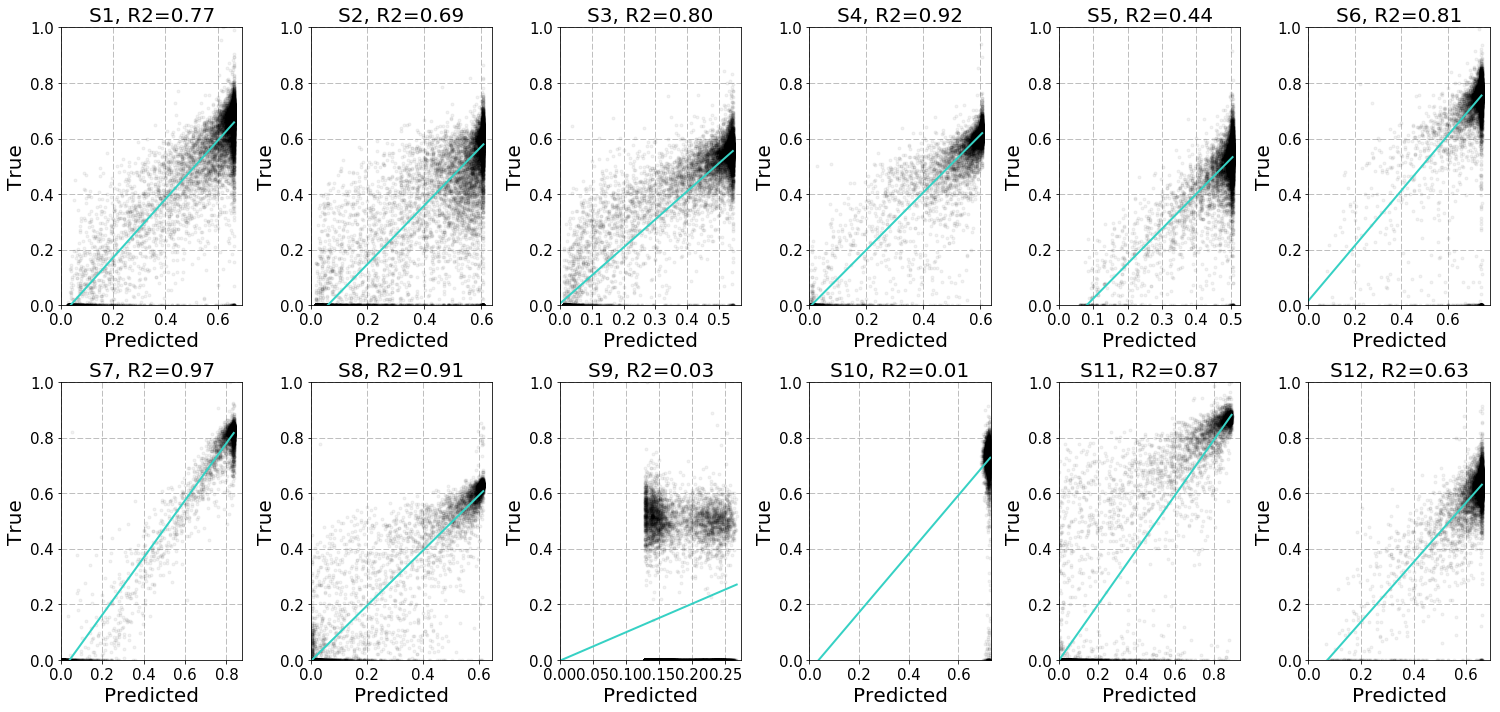

In [124]:
plt.figure(figsize=(6*3+3,10))
count=1
for chunk in chunks:
    
    y = true[chunk]
    y_pred = predicted[chunk]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred,y.flatten())
    
    plt.subplot(2,6,count)
    plt.tight_layout()
    plt.title(chunk+', R2=%.2f'% r_value**2, fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Predicted',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.plot(predicted[chunk][:10000], true[chunk][:10000], 'ok', alpha=0.05,ms=3)
    plt.ylim(0,1)
    plt.xlim(0,)
    f=lambda x: slope*x+intercept
    x=np.array([0,max(predicted[chunk][:10000])])
    plt.plot(x, f(x), color='#36D1C4',lw=2)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    count+=1
    
plt.savefig('../predicted_true.pdf')

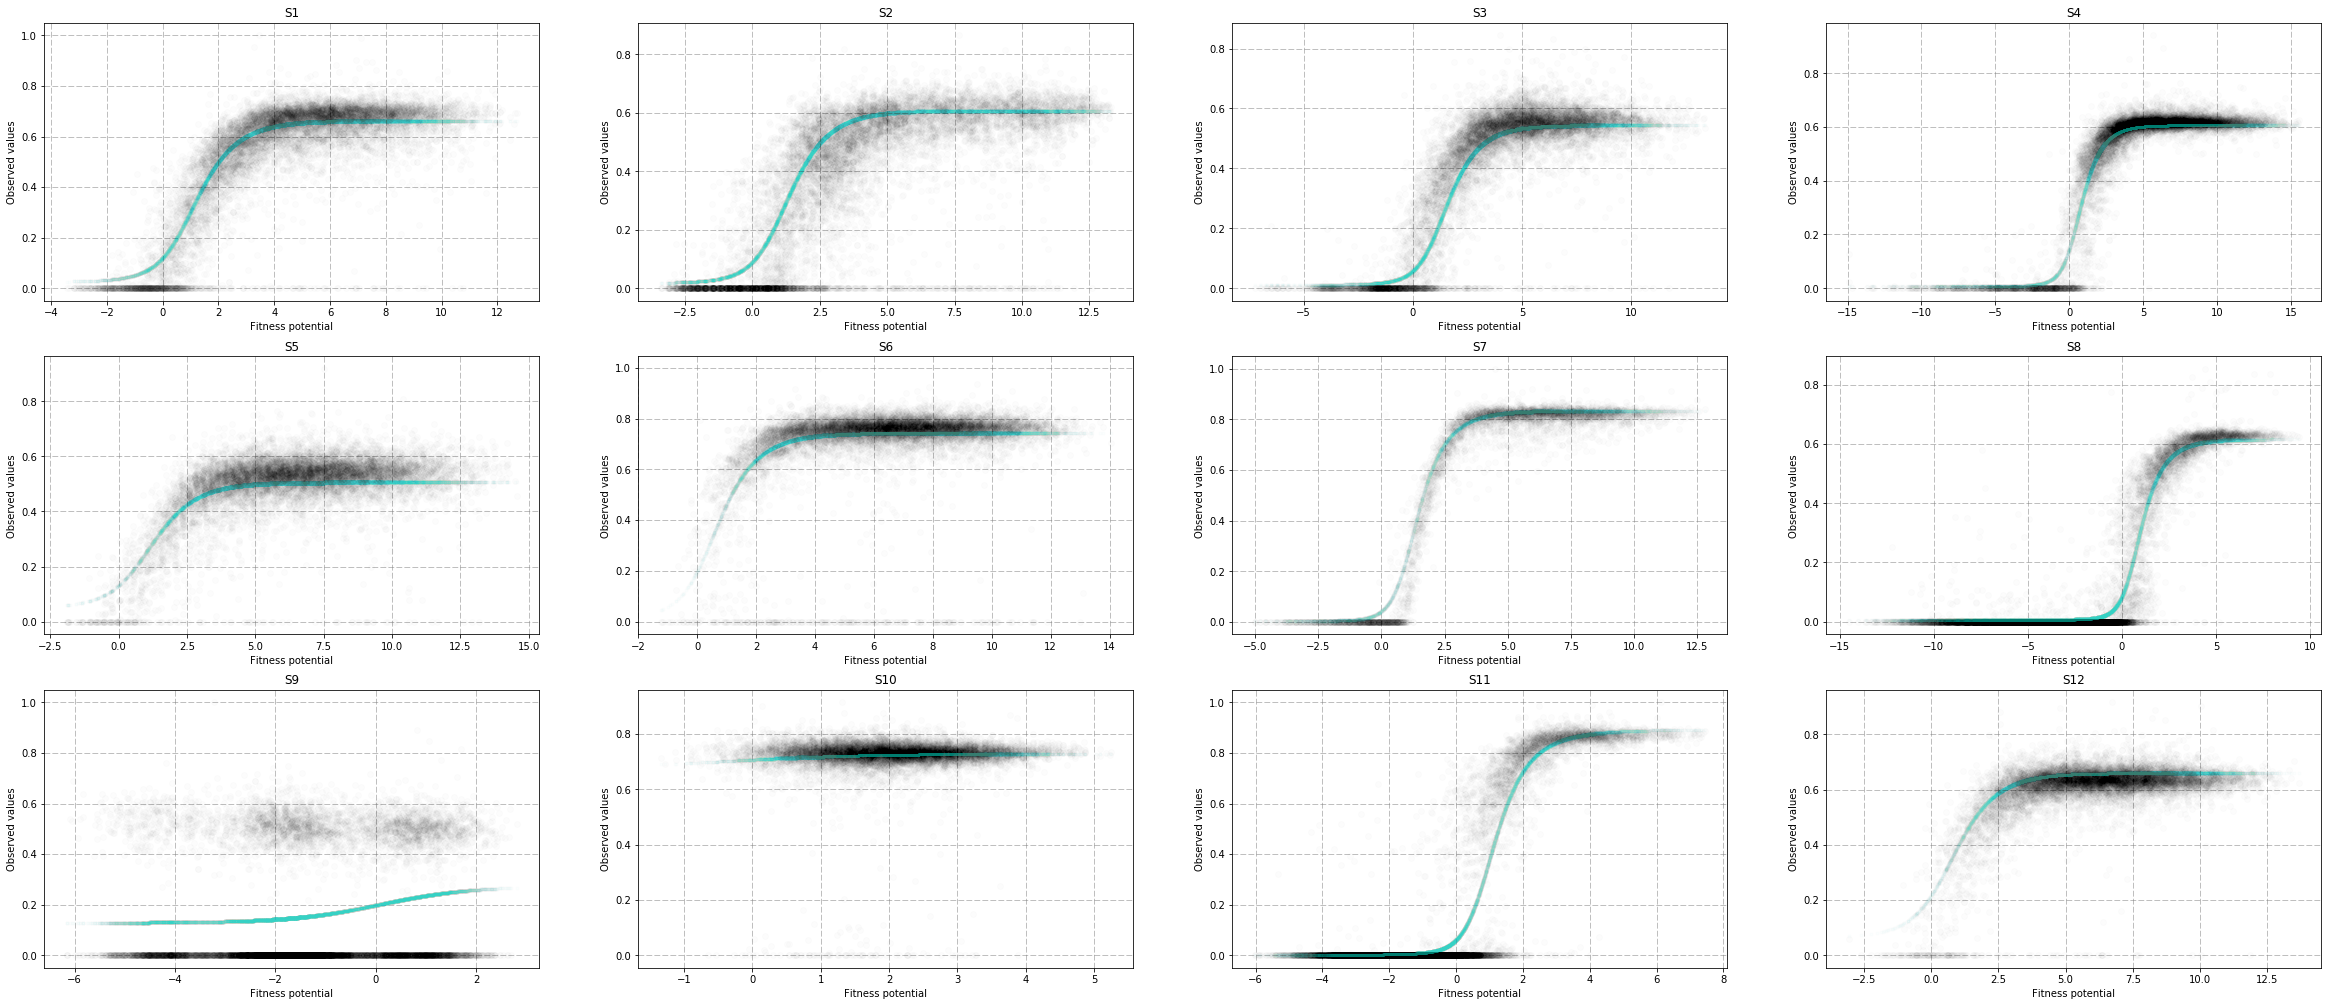

In [127]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    X = fitness_potential[chunk][:10000]
    Y = true[chunk][:10000]
    plt.plot(X, Y, 'ok', alpha = 0.01)
    plt.plot(X, predicted[chunk][:10000], '.', c='#36D1C4', alpha = 0.01)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Fitness potential')
    plt.ylabel('Observed values')
    count+=1
    
plt.savefig('../fp_fitness.pdf')

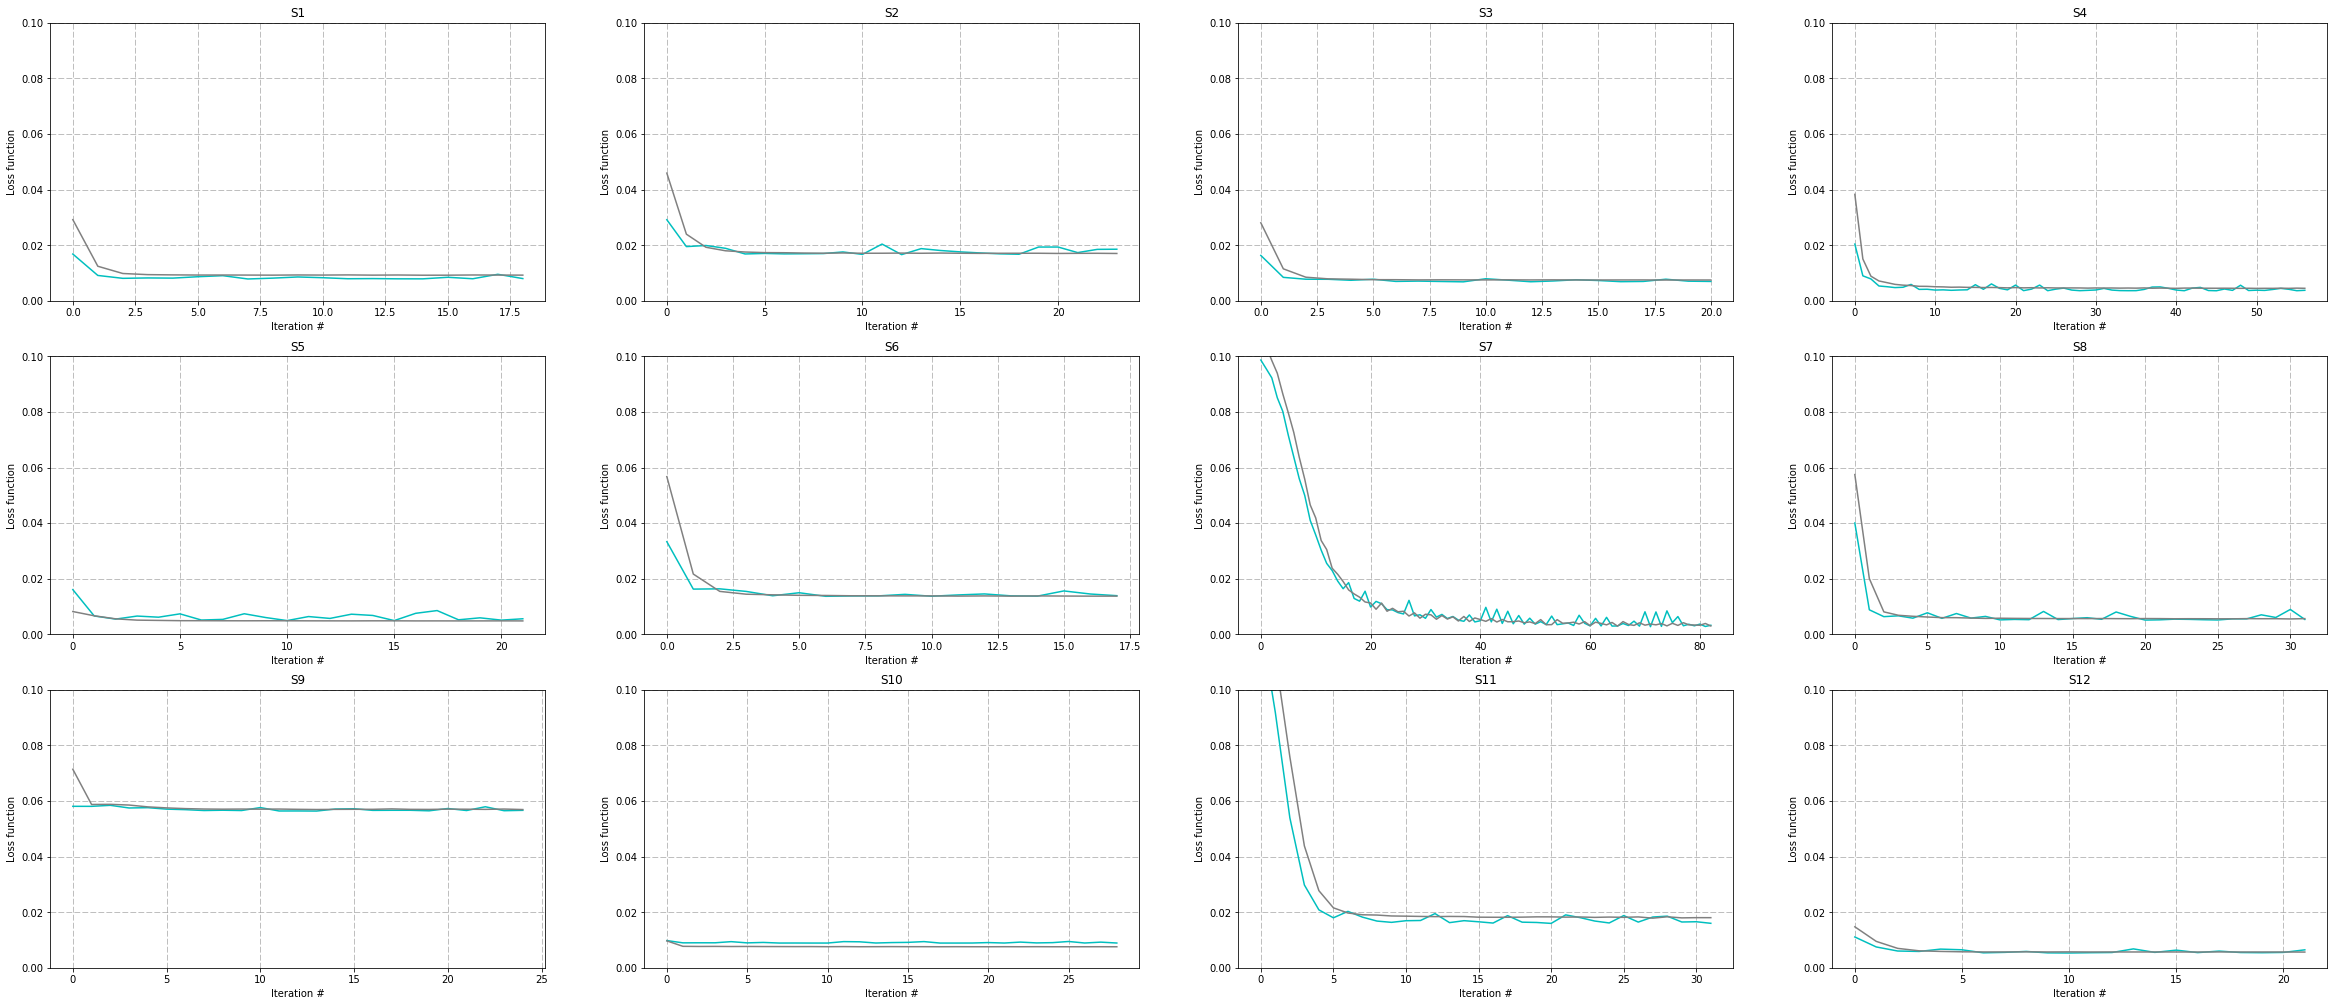

In [54]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.plot([x for x in range(len(hist[chunk].history['val_loss']))], hist[chunk].history['val_loss'], 'c')
    plt.plot([x for x in range(len(hist[chunk].history['val_loss']))], hist[chunk].history['loss'], 'gray')
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    plt.xlabel('Iteration #')
    plt.ylabel('Loss function')
    plt.ylim(0, 0.1)
    count+=1

#### 2.4. Extracting residuals

In [22]:
residualsDF = {}

for chunk in chunks:
    residualsDF[chunk] = pd.DataFrame(predicted[chunk] - true[chunk], index = aa_seq[chunk])

    residualsDF[chunk]['fitnessPotential'] = fitness_potential[chunk]
    residualsDF[chunk]['observed'] = true[chunk]
    residualsDF[chunk].columns = ['predictedMinusObserved', 'fitnessPotential', 'observed']
    residualsDF[chunk].to_csv('../residuals/' + chunk + '.csv', sep=',')

#### 2.5. Extracting weights

In [23]:
weightsDF = {}

for chunk in chunks:
    weightsDF[chunk] = pd.DataFrame(weights[chunk], index = unique_mutations[chunk], columns=['weight'])
    weightsDF[chunk].to_csv('../weights/'+chunk+'.csv', sep=',')

# 3. Checking correlations and loss function

### 3.1. Correlations prediction vs observed + Lucas's values

In [62]:
y_pred.shape

(58066,)

In [63]:
r_values = []

for chunk in chunks:
    y = true[chunk]
    y_pred = predicted[chunk]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y.flatten(),y_pred)
    r_values.append(r_value)
    
lucas = [0.76386, 0.62877, 0.80256, 0.91289, 0.49342, 0.15075, 0.97532, 0.88078, 0.01069, 0.0096183, 0.81741, 0.54172]

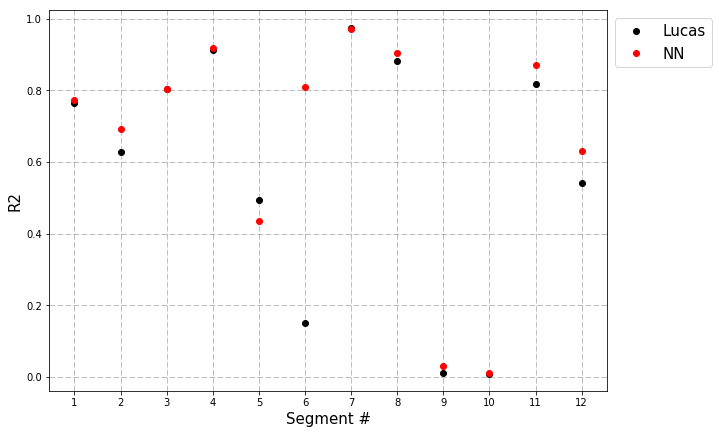

In [64]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], lucas, 'ok', label='Lucas')
plt.plot([x for x in range(1, 13)], [x**2 for x in r_values], 'or', label='NN')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
plt.ylabel('R2', fontsize=15)
plt.xticks([x for x in range(1,13)]);

In [65]:
zip(chunks,[x**2 for x in r_values])

[('S1', 0.77442387516841826),
 ('S2', 0.69222039735917484),
 ('S3', 0.80278686101976005),
 ('S4', 0.91836771702128561),
 ('S5', 0.43512286878897682),
 ('S6', 0.80973800391736472),
 ('S7', 0.97245322643590981),
 ('S8', 0.90559302265648067),
 ('S9', 0.031180767184178986),
 ('S10', 0.0099302010842225452),
 ('S11', 0.87015375482174717),
 ('S12', 0.62976592401922649)]

# 4. Crossvalidation

### 4.1. Comparing train and test sets predictions R2

In [35]:
rDictTrain = {}
rDictTest = {}

In [ ]:
min_max_scaler = MinMaxScaler()
n_iter = 500

for chunk in chunks:
    
    rDictTrain[chunk] = []
    rDictTest[chunk] = []
    
    print (chunk)
    
    for i in range(10):
        print (i)
        
        data, labels, unique_mutations[chunk], aa_seq[chunk] = read_data_all_positions(chunk)

        scaledLabels = min_max_scaler.fit_transform(labels.reshape(-1,1))

        x_train, x_valid, y_train, y_valid = train_test_split(data, scaledLabels, test_size = 0.05)

        model = Sequential()

        model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer='glorot_normal'))
        model.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
        model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        model.compile(optimizer=opt,
                      loss='mean_squared_error',
                      verbose=0)

        hist[chunk] = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                                epochs=n_iter, batch_size=500, shuffle=True, verbose=0)

        trainProba = model.predict_proba(x_train, batch_size=500, verbose=0)
        testProba = model.predict_proba(x_valid, batch_size=500, verbose=0)

        _,_,r,_,_ = stats.linregress(y_train.flatten(), trainProba.flatten())
        rDictTrain[chunk].append(r)

        _,_,r,_,_ = stats.linregress(y_valid.flatten(), testProba.flatten())
        rDictTest[chunk].append(r)         

S1
0
1
2
3
4
5
6
7
8
9
S2
0
1
2


In [116]:
from collections import OrderedDict
r2DictTest = OrderedDict()
for chunk in chunks:
    r2DictTest[chunk] = [r*r for r in rDictTest[chunk]]

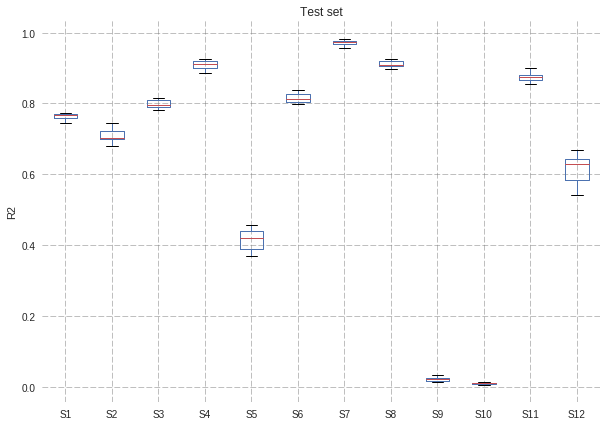

In [117]:
rTest = pd.DataFrame.from_dict(r2DictTest)
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.ylabel('R2')
plt.title('Test set')
rTest.boxplot();

In [114]:
r2DictTrain = OrderedDict()
for chunk in chunks:
    r2DictTrain[chunk] = [r*r for r in rDictTrain[chunk]]

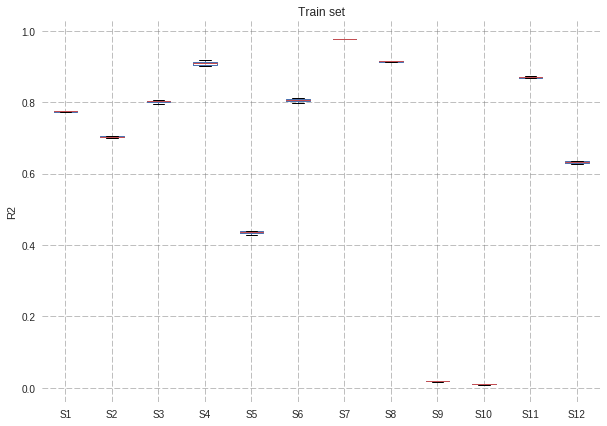

In [115]:
rTrain = pd.DataFrame.from_dict(r2DictTrain)
plt.figure(figsize=[10,7])
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.ylabel('R2')
rTrain.boxplot()
plt.title('Train set');

In [119]:
chunkCol = []
trainTestCol = []
r2Col = []

for chunk in chunks:
    chunkCol.extend([chunk]*len(r2DictTrain[chunk]))
    trainTestCol.extend(['train']*len(r2DictTrain[chunk]))
    r2Col.extend(r2DictTrain[chunk])
                        
    chunkCol.extend([chunk]*len(r2DictTest[chunk]))
    trainTestCol.extend(['test']*len(r2DictTest[chunk]))
    r2Col.extend(r2DictTest[chunk])    

In [120]:
r2DF = pd.DataFrame()

r2DF['chunk'] = chunkCol
r2DF['trainTest'] = trainTestCol
r2DF['R2'] = r2Col

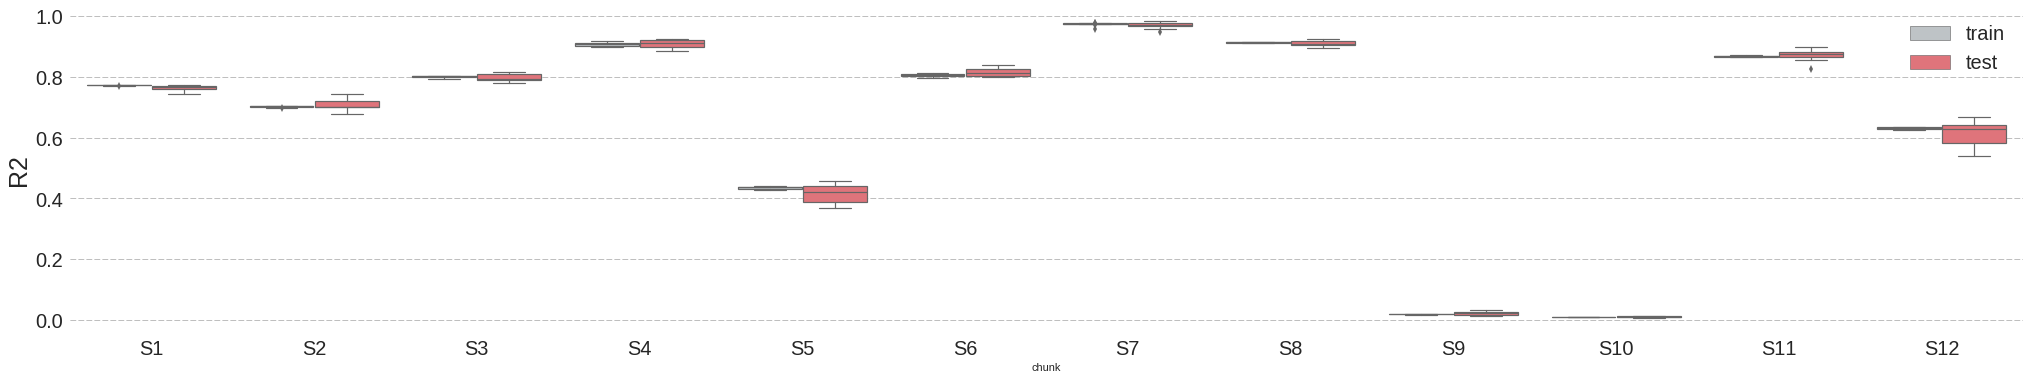

In [192]:
colors = ["#BDC3C7","#F1626C"]
x = sns.color_palette(colors)

plt.figure(figsize=[35,6])
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
sns.boxplot(x = r2DF.chunk, y = r2DF.R2, hue=r2DF.trainTest, palette=x, width=0.8, linewidth=1.2)
plt.legend(fontsize=20)
plt.ylabel('R2', fontsize=25)
plt.tick_params(labelsize=20);